# Parcours linéaires

[Vidéo d'accompagnement ... à voir après une première lecture](https://vimeo.com/426401414)

## Qu'est-ce qu'un algorithme?

Un **algorithme** vise à *produire une solution* (sa sortie) à un problème donné en indiquant *comment* l'obtenir à partir des *données* (entrées) du problème. Pour cela, on précise étape après étape (et dans les moindres détails quand l'opérateur est une machine), le travail à effectuer sur les données en entrée.

Une recette de cuisine en est un bon exemple. Elle précise comment obtenir un certain «plat» (sortie) - solution du problème «faire un repas» - en précisant les ingrédients (entrées) nécessaires et aussi les *instructions* qui décrivent comment les travailler étape par étape.

Le mot «algorithme» est dérivé du nom du mathématicien persan [Al-Khwârizmî](https://fr.wikipedia.org/wiki/Al-Khw%C3%A2rizm%C3%AE) (780-850) (duquel est aussi dérivé le mot «algèbre» en passant) en hommage à ses nombreux travaux dans le domaine (et même si des algorithmes existaient déjà bien avant lui).

Ainsi, les algorithmes sont apparus bien avant l'ère de l'informatique. Par exemple, le célèbre «**crible  d'Ératosthène**» (3e s. avant J.C.) qui vise à trouver tous les *nombres premiers* (nombres entiers $\geqslant 2$ qui ne sont divisibles que par 1 ou par eux-même: 2, 3, 5, 7 ...) inférieures à un nombre donné à l'avance:

<pre><strong>Erathosthène</strong>(N:entier):
    écrire, en partant de 2, la liste de tous les nombres entiers inférieurs ou égaux à N
    <strong>Tant qu</strong>'il reste des nombres ni «barrés» ni «entourés» dans cette liste:
        «entourer» le plus petit nombre ni «barré», ni «entouré»
        «barrer» tous ses multiples (sauf lui-même!)
    <strong>Fin tant que</strong>
    <strong>renvoyer</strong> la liste des nombres entourés
</pre>

*Exemple*: Pour N=12, **avant** chaque itération de la boucle:
- itération 1: 2,3,4,5,6,7,8,9,10,11,12
- itération 2: <mark>2</mark>,3,<s>4</s>,5,<s>6</s>,7,<s>8</s>,9,<s>10</s>,11,<s>12</s>
- itération 3: <mark>2</mark>,<mark>3</mark>,<s>4</s>,5,<s>6</s>,7,<s>8</s>,<s>9</s>,<s>10</s>,11,<s>12</s>
- itération 4: <mark>2</mark>,<mark>3</mark>,<s>4</s>,<mark>5</mark>,<s>6</s>,7,<s>8</s>,<s>9</s>,<s>10</s>,11,<s>12</s>
- itération 5: <mark>2</mark>,<mark>3</mark>,<s>4</s>,<mark>5</mark>,<s>6</s>,<mark>7</mark>,<s>8</s>,<s>9</s>,<s>10</s>,11,<s>12</s>
- itération 6: <mark>2</mark>,<mark>3</mark>,<s>4</s>,<mark>5</mark>,<s>6</s>,<mark>7</mark>,<s>8</s>,<s>9</s>,<s>10</s>,<mark>11</mark>,<s>12</s>

Ainsi, l'itération 6 n'aura pas lieue (chaque nombre étant soit entouré, soit barré) et l'algorithme renvoie 2, 3, 5, 7 et 11.

Enfantin ... non? Malheureusement, si cette formulation de l'algorithme est «simple» pour un opérateur humain, elle est loin d'être compréhensible par une machine: que signifie pour elle *barrer*, *entourer* et la condition *il reste des nombres ni «barrés» ni «entourés» dans cette liste*? 

Il va donc être nécessaire de **préciser** à la machine la **signification** des instructions contenues dans les algorithmes et ainsi d'essayer de les formuler à mi-chemin entre «ce qui est le plus compréhensible pour nous» et «ce qui convient aux machines» afin de faciliter leur **implémentation**.

> **Implémentation**: réalisation effective d'un algorithme dans un langage de programmation.

#### Exercice 1

Implémenter le «critère d'Érathostène» en Python. 

*Conseil*: Le fait de chercher un peu devrait vous aidez grandement à comprendre la solution donnée ci-après en deux étapes:
- **sol1**: Réécriture de l'algorithme dans un langage intermédiaire appelé *pseudo-code* (proche d'un vrai langage de programmation mais plus facile pour un «humain»). Regarder cette solution pour vous débloquer si besoin.
- **sol2**: Une implémentation en Python de l'algorithme comme demandé. 
____

**sol1**

**Conventions principales du pseudo-code**: 
- la flèche gauche `←` désigne l'affectation d'une valeur à une variable. 
- L'index du *premier* élément d'une liste est **1** (contrairement à Python...).
- Ce qui suit ⊳ est un commentaire.

**Idée principale** - interpréter:
- «barrer»: «mettre à zéro» (car zéro ne fait pas partie de la liste initiale...)
- «entourer»: ne considérer que le plus grand nombre dont on veut éliminer les multiples à chaque étape; je l'appelle `courant`.
- «il reste des entiers ni barrés ni entourés»: l'index de `courant` ne doit pas excéder l'index maximum des éléments de la liste. 

<pre><strong>Erathosthène</strong>(N:entier):
 1    L ← 2,3,..,N     ⊳ observer que l'index d'un nombre est «ce nombre» - 1 (cf ligne 9)
 2    S ← liste vide
 3    i ← 1
 4    <strong>Tant que</strong> i ≤ N-1:
 5        courant ← L[i]
 6        ajouter courant à S
 7        multiple ← 2 * courant
 8        <strong>Tant que</strong> multiple ≤ N:
 9            L[multiple - 1] = 0 ⊳ voir commentaire ligne 1
10            multiple ← multiple + courant
11        <strong>Fin tant que</strong>
12        i ← i + 1
13        <strong>Tant que</strong> i ≤ N-1 ET L[i] ≟ 0:
14            i ← i + 1
15        <strong>Fin tant que</strong>
16     <strong>Fin tant que</strong>
17     <strong>renvoyer</strong> S
</pre>

Boucle lignes 8-11: sert à «barrer» les multiples de `courant`

Boucle ligne 12-11: sert à trouver l'index de `courant` pour la prochaine itération de la boucle principale.

**sol2**

In [ ]:
# La difficuté principale est de bien gérer les index 
# qui démarrent à 0 en Python (1 de moins qu'en pseudo-code).

def erathostène(N):
    L = list(range(2, N + 1))  # index 0 à N-2
    S = []
    i = 0
    while i <= N - 2:
        courant = L[i]
        S.append(courant)
        multiple = 2 * courant
        while multiple <= N:
            L[multiple - 2] = 0
            multiple += courant
        i += 1
        while i <= N - 2 and L[i] == 0:
            i += 1
    return S

print(erathostène(1000000))

## Collections indexées et conventions

En informatique, on a souvent besoin de gérer des **collections de données**.

Il en existe *plusieurs sortes* - tableau, pile, file, ensemble, tas, listes simplement ou doublement chaînés, arbre, graphe... Elles se distinguent par les *requêtes* et *opérations* qu'elles supportent, le **coût** de ses dernières *en temps* (et parfois *en mémoire* consommé) et enfin par leur organisation interne - leur *implémentation*. C'est l'un des rôles de l'algorithmique que de définir ces différentes sortes de collections.

**En classe de première**, nous nous intéresserons principalement à des algorithmes qui travaillent sur des **collections** ***indexées***, c'est-à-dire pour lesquelles *chaque élément de la collection est repéré par un entier*, son **index** (ou indice).

**En algorithmique, nous conviendrons que**, si $A$ désigne une *collection indexées* (ou tableau ou «liste» en Python):
- longueur(A) - souvent abrégé $\bf n$ - désigne le *nombre d'éléments* de $A$,

- **si** $i$ est un entier compris entre $\bf 1$ et $n$, $A[i]$ désigne l'unique élément d'**index** $i$ de $A$

  **sinon** l'écriture $A[i]$ est *incorrecte*.
  > j'insiste, contrairement à Python, **l'index du premier élément sera 1** par convention.
    

- L'écriture $A[p..q]$ désignera le **sous-tableau** des éléments de $A$ dont l'index est situé entre les entiers $p$ et $q$ **inclus**. 

  > **attention**: si $p>q$, l'écriture est considérée comme correct (par convention) et désigne un sous-tableau **vide** (ex: $A[0]$ est incorrect mais $A[1..0]$ est correct!)$$p>q \implies A[p..q]=\emptyset$$
    
Enfin, il est utile d'observer et de retenir que (si $p\leqslant q$): $$A[p..q]\text{ contient } q-p+1 \text{ éléments }$$
    
Et aussi que $A[1..n]$ est une façon alternative d'écrire $A$: $$A[1..n]=A\text{ si } n=\text{longueur(A)}$$

**Exemple récapitulatif**: Si $A=5,12,8,7,9,36$ alors $A[1]$ désigne $5$; $A[3..5]$ désigne $8, 7, 9$, il contient $q-p+1=5-3+1=3$ éléments; $A[1..6]=A$; $A[0]$, $A[7]$ sont des écritures incorrectes mais $A[7..6]$ est correcte (par convention) et désigne un sous-tableau vide $\emptyset$. 

## Recherche d'un élément dans un tableau

*Données*: un tableau $A[1..n]$ contenant des «objets» et un objet $x$.

*Problème*: trouver l'index de $x$ dans $A$ si $x$ est dans $A$ ou «répondre» $-1$ sinon.

<pre><strong>Chercher</strong>(A, x):
    n ← longueur(A)
    <strong>Pour</strong> i de 1 à n:
        <strong>Si</strong> A[i] ≟ x: <strong>renvoyer</strong> i
    <strong>renvoyer</strong> -1</pre>

*Notes*: En algorithmique l'**affectation** d'une valeur $v$ à une variable $x$ s'écrit $x\leftarrow v$ - lire «$x$ prend la valeur $v$». La **comparaison** s'écrit «=» ou «≟».

**Question**: Dans la «vrai vie», on ne sait à l'avance ce qui va nous arriver... Est-ce que cet algorithme est correct dans le cas d'un tableau vide en entrée?

Et bien **ça dépend**! Si on veut pouvoir écrire tranquillement «Pour i de 10 à 1» pour dire $i$ vaudra 10 puis 9 puis 8 etc. jusqu'à 1, la réponse est **NON** car ici, si A est vide, cela donne «Pour i de 1 à 0» et l'écriture $A[0]$ n'est pas permise (produit une erreur)... 

Pour obtenir la réponse OUI, on peut *convenir* d'écrire «Pour i de 10 à 1 en décroissant» par exemple.

Et pour python?

In [ ]:
# tester vous même!
for i in range(1,0):
    print("pas ok")
print("ok")

### Efficacité ou *coût en temps*

Un algorithme peut prendre un temps variable à s'exécuter selon la taille de son entrée. C'est le cas de cet algorithme de recherche:
- Si on est optimiste, la valeur cherchée est en début de tableau auquel cas la boucle ne s'exécutera qu'une fois (indépendamment de la taille réelle du tableau).
- Si on est pessismiste, la valeur ne sera pas dans le tableau et la boucle s'éxécutera $n$ fois où $n$ est la taille du tableau. (**pire cas**)

Lorsqu'on analyse l'efficacité d'un algorithme on s'intéresse souvent au **cas le plus défavorable** car en pratique, il ne manque pas de se produire (voir la [loi de Murphy](https://fr.wikipedia.org/wiki/Loi_de_Murphy))! Nous nous placerons (presque) toujours dans cette hypothèse pour évaluer l'efficacité des algorithmes.

Ici, on peut dire qu'en général:
> plus le tableau contient d'éléments, plus la recherche sera longue.

Plus précisément, on peut estimer que le **coût en temps** de cet algorithme **est proportionnel à la taille $n$ du tableau** (car la boucle «tournera» $n$ fois). En algorithmique, on résume ce fait en disant que l'efficacité de l'algorithme est $O(n)$ (prononcer «O de n»). Récapitulons
> L'efficacité d'un algorithme est $O(n)$ si son temps d'exécution est proportionnelle à la taille $n$ de son «entrée».

### Savoir adapter un algorithme ...

Supposer un instant que notre tableau contienne des «objets» qui représentent des personnes comme `{"prenom": "paul", "nom": "Alexandre", "age": 12,...}` et qu'on souhaite chercher un prénommé "pierre" dedans.

L'algorithme donné plus tôt ne fonctionne plus... Néanmoins la **stratégie** qu'il utilise est toujours applicable. Il suffit de l'*adapter*: 

<pre><strong>Chercher′</strong>(A, clé, valeur):
    n ← longueur(A)
    <strong>Pour</strong> i de 1 à longueur(A):
        <strong>Si</strong> (A[i])[clé] ≟ valeur: <strong>renvoyer</strong> i
    <strong>renvoyer</strong> -1</pre>

*Note*: nous utilisons la même forme d'écriture que celles des dictionnaires en Python; on aurait donc pu écrire plus simplement $A[i][\text{clé}]$ plutôt que $(A[i])[\text{clé}]$.

Il suffit alors d'appeler `Chercher(A, "prenom", "pierre")` pour obtenir l'information voulue.

En algorithmique, pour mieux faire ressortir la «stratégie», on suppose souvent que les objets des collections sont «simples» comme des entiers par exemple. Il «suffit» alors d'être en mesure d'**adapter cette stratégie** pour un problème similaire à celui qu'on a déjà résolu.

#### Exercice 2

Adapter l'algorithme dans le cas où on recherche un objet $x$ dans le sous-tableau $A[p..q]$ (on renvoie toujours l'index par rapport au tableau $A$).

Cet algorithme est-il un *cas particulier* ou une *généralisation* du premier?

<pre><strong>Chercher″</strong>(A, x, p, q):
    <strong>Si</strong> q < p: <strong>renvoyer</strong> -1 ⊳ aviez-vous penser à cette <em>pré-condition</em>?
    <strong>Pour</strong> i de p à q:
        <strong>Si</strong> A[i] ≟ x: renvoyer i
    <strong>renvoyer</strong> -1
</pre>

*Note*: le symbole «⊳» est utilisé pour annoncer un commentaire.

C'est une **généralisation** car `Chercher″(A, x, 1, longueur(A))` produit le même résultat que `Chercher(A, x)`.

## Valeur minimum d'un tableau

**Donnée**: un tableau $A$ non vide d'entiers.

**Problème**: trouver l'*index* du plus petit entier du tableau (ou de l'un deux s'il y en a plusieurs).

<pre><strong>Minimum</strong>(A):
    n ← longueur(A)
    imin ← 1
    <strong>Pour</strong> i de 2 à n:
        <strong>Si</strong> A[i] < A[imin]:
            imin ← i
    <strong>renvoyer</strong> imin</pre>

Cet algorithme est «un poil» plus subtile. On peut résumer sa stratégie par: 

> «trouver, *pendant l'itération $i$*, l'élément minimum du sous-tableau $A[1..i]$».

Illustration de son fonctionnement sur quelques itérations successives:

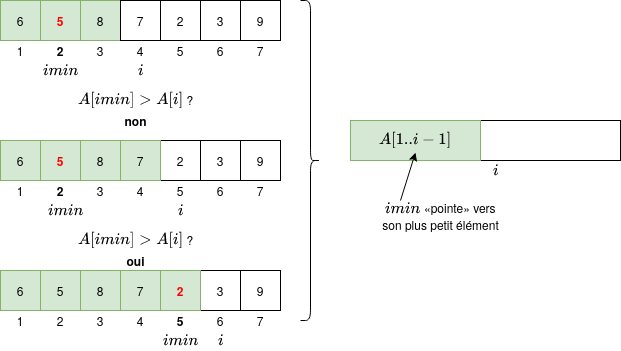

### Preuve de l'algorithme - notion d'**invariant de boucle**

[Vidéo d'accompagnement ... à voir après une première lecture](https://vimeo.com/426403020)

Un algorithme - comme un théorème en mathématiques - se **justifie** pour *au moins* trois raisons:
1. il peut être utilisé dans un système actif (pilotage automatique d'un avion...) dont l'échec peut avoir des conséquences catastrophiques... une preuve garantie qu'il n'aura pas de défaillance,
2. Les algorithmes se construisent «les uns par dessus les autres» - ils se combinent - et cela peut entraîner un effondrement du système qu'ils réalisent si l'un d'eux échoue,
3. Analyser finement les algorithmes permet d'aiguiser son «intuition algorithmique» et de trouver rapidement des solutions fiables et efficaces aux problèmes qu'on rencontre. 

**L'objectif ici est de donner une idée des techniques qu'on emploie pour y parvenir**. En avant!

Pour prouver que cet algorithme est correct on va prouver l'«**invariant de boucle**» suivant: 
> *Au début de chaque itération* (de la boucle Pour), `imin` est l'index du (d'un des) plus petit élément du sous-tableau  $A[1..i-1]$ où $i$ est la variable de boucle.

**Voici l'idée principale de la preuve**: 
1. Vérifier qu'il (l'invariant de boucle) est vrai au démarrage (pour la première itération),
2. Puis démontrer que: **si** *il est vrai pour une itération quelconque* **alors** *il l'est aussi pour la suivante*.

On aura alors prouvé qu'il est vrai **pour toute itération** justifiant ainsi son appellation d'«invariant de boucle». 

*Pourquoi*? On suppose avoir réussi ces 2 étapes. D'après 1., il est vrai pour la première itération. Mais 2. entraîne alors qu'il est vrai pour la seconde itération, laquelle entraîne, à son tour et toujours d'après 2. qu'il est vrai pour la troisième, laquelle ... et ainsi de suite: ça ne s'arrête que lorsque la boucle termine!

**Les dominos**: Une image pour vous aidez encore à «comprendre ce principe»: imaginer des dominos les uns à la suite des autres. Supposer qu'ils sont disposés de façon que: *si l'un tombe, il fait tomber celui qui le suit* (point 2.). 

On vous apprend tout à coup que le premier de la suite est tombé (point 1.). 

Que pensez-vous qu'il arrive?

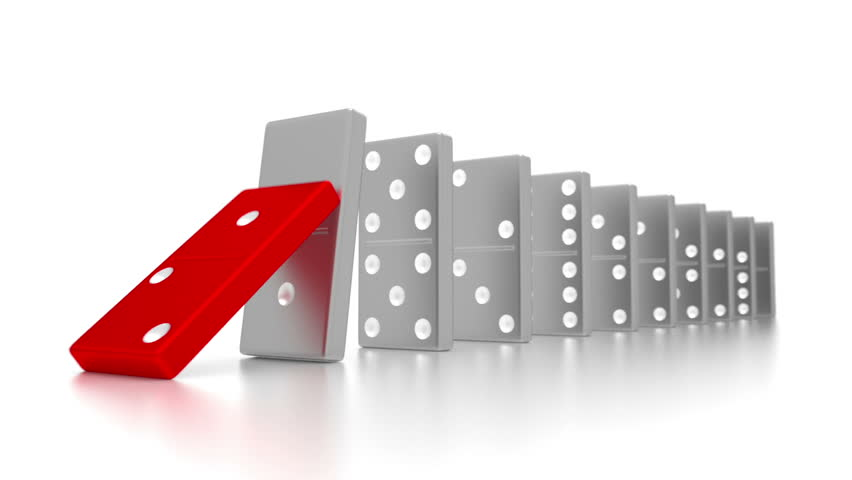

Prouvons l'invariant de boucle «$A[imin]$ est le minimum de $A[1..(i-1)]$»:

> disposer l'écran de façon à avoir en vue l'algorithme!

1. **au début** de la toute première itération, on a $i=2$ donc $i-1=1$ et $A[1..i-1]=A[1..1]$ n'a qu'un élément. Ainsi, imin$=1$ est bien l'index du plus petit élément du sous-tableau $A[1..i-1]$.

2. **d'une itération à la suivante**: *supposons* que notre invariant est correct (vrai) au début d'*une* itération (n'importe laquelle!). 

  Dans la boucle, le plus petit élément de $A[1..i]$ est soit $A[i]$ soit $A[imin]$. *Pourquoi?* Et bien parce que d'après notre hypothèse $A[imin]$ est le plus petit élément de $A[1..(i-1)]$!
  
  - Dans le premier cas, $A[i]<A[imin]$, et imin est actualisé correctement ($imin \leftarrow i$). 
  
  - Dans le second, il n'y a rien à faire (pas de Sinon...). 
  
  Ainsi, *Dans tous les cas*, au début de l'itération suivante, $imin$ est l'index du plus petit élément de $A[1..i]$.

  Cela prouve que, *si* l'invariant est juste au début d'*une* itération (n'importe laquelle) *alors* il est encore juste pour la suivante. 

**Conclusion**: «l'invariant de boucle» est bien nommé car il est vrai au début de **toutes les itérations**.

*Et alors????* Et bien cela prouve rigoureusement la **correct**ion de l'algorithme.

En effet, *à la fin* de la dernière itération, $i$ vaut $\text{longueur}(A)+1$, (raison pour laquelle la boucle termine) et, d'après notre invariant de boucle, $imin$ est l'indice du plus petit élément de $A[1..(i-1)]=A[1..\text{longueur}(A)]=A$, ce qu'on voulait démontrer.

#### Exercice 3

Trouver un invariant de boucle pour l'algorithme de recherche d'un élément dans un tableau (inutile de le prouver mais vous pouvez tout de même y réfléchir...)

Invariant de boucle:
>Au début de chaque itération: $x\in A[i..n]$ ou $x\not\in A$

Si on l'admet, il prouve la **correction** de l'algorithme car il n'y a que deux cas possibles:
- si la boucle s'arrête prématurément c'est que $A[i]=x$ à un moment et, dans ce cas, l'algorithme renvoie $i$ ce qui est encore correct. 
- si la boucle va au bout, $i$ vaut alors $n+1$ et $$A[i..n]=A[(n+1)..n]=\emptyset$$
  Comme $x\in\emptyset$ est évidemment faux alors $x\not\in A$ est nécessairement vrai or, on renvoie $-1$ dans ce cas ce qui est correct.

### La «vache» c'est compliqué de «démontrer» des algorithmes!

Il est vrai ... la chose n'est pas très agréable ... on préférerait s'en remettre à l'«intuition».

Tout d'abord, noter bien qu'on n'attend pas de vous de «démontrer des algorithmes» mais seulement de vous familiariser avec les techniques d'analyse sous-jacentes. C'est nécessaire pour comprendre des algorithmes plus élaborés que nous verrons par la suite.

En bref, l'expérience montre que l'«intuition» n'est pas fiable en général et encore moins en informatique. L'«intuition constructive» qu'on peut nommer «art» s'acquiert par un patient travail d'étude et d'analyse de cas. C'est justement ce que peut vous apporter l'algorithmique:
- **prendre de la hauteur de vue**: ne pas se laisser perturber par les détails non pertinents,
- **acquérir de l'expérience**: pour ne pas toujours recommencer les mêmes erreurs,
- **développer sa capacité à «concevoir»**: pour pouvoir réaliser des (ses) projets. 

Vous n'êtes pas convaincu? Faites l'effort tout de même et vous verrez que vos progrès vous étonnerons vous-même!

### Adapter...

Toujours dans le contexte de l'«algorithme du minimum»:

#### Exercice 4

On suppose que notre tableau contient des «objets» comme par exemple `{"age": ..., "prenom": ..., "nom": ...}`.  

Dans cet exemple, on peut vouloir trouver l'un des plus jeunes (clé="age"), ou bien l'un de ceux qui vient en premier dans l'ordre alphabétique des noms (clé="nom") etc.

Adapter l'algorithme du minimum à ce cas - `Minimum(A, clé):...` - puis l'implémenter en Python.
___

Par exemple:
<pre><strong>Minimum′</strong>(A,clé)
    n ← longueur(A)
    imin ← 1
    objmin ← A[imin]
    <strong>Pour</strong> i de 2 à n:
        courant ← A[i]
        <strong>Si</strong> courant[clé] < objmin[clé]:
            imin ← i
            objmin ← courant
    <strong>renvoyer</strong> imin</pre>

La stratégie de parcours et de mise à jour reste la même que dans l'algorithme de base. D'ailleurs, comme $(A[i])[\text{clé}]$ ou $A[i][\text{clé}]$ désigne la valeur de la clé pour l'objet du tableau $A$ d'index $i$, on peut écrire plus brièvement:

<pre><strong>Minimum′</strong>(A,clé):
    n ← longueur(A)
    imin ← 1
    <strong>Pour</strong> i de 2 à longueur(A):
        <strong>Si</strong> (A[i])[clé] < (A[imin])[clé]:
            imin ← i
    <strong>renvoyer</strong> imin</pre>

ce qui montre mieux la similarité: la seule chose qui change est qu'on «fouille» un des aspects de l'objet pour effectuer la comparaison.

```python
def minimum_cle(A, cle):
    imin = 1
    n = len(A)
    for i in range(2, n):
        if A[i][cle] < A[imin][cle]:
            imin = i
    return imin
```

#### Exercice 5

Implémenter l'algorithme du minimum de façon à ce que la recherche ait lieu dans le sous-tableau $A[p..q]$ - `minimum_borne(A, p, q)`. Comparer les objets *directements* (vous pouvez supposer que ce sont des entiers) et vérifier que le sous-tableau n'est pas vide.
_____

In [ ]:
def minimum_borne(A, p, q):
    assert p <= q, "Erreur: le sous-tableau est vide!" # erreur si le tableau est vide
    # on pourrait adopter une autre «politique» comme:
    # if p > q: return -1
    imin = p
    for i in range(p+1, q+1):
        if A[i] < A[imin]:
            imin = i
    return imin

# test!
from random import randint
liste = [randint(0,100) for i in range(20)]
print(liste)
print(liste[5:14])
i = minimum_borne(liste, 5, 13)
print(liste[i])

#### Exercice 6

Écrire une fonction `plus_proche` permettant de rechercher la plus proche valeur d'un nombre dans un tableau.

*Aide*: utiliser la valeur absolue de la différence `abs(a-b)` pour mesurer la distance entre deux nombres a et b.

*Exemple*: `plus_proche([45, 22, 56 , 12, 1, 8, 30, 21, 6, 33], 20)` doit renvoyer 21.
___

In [ ]:
def plus_proche(A, x):
    n = len(A)
    imin = 1
    dmin = abs(x - A[0])
    for i in range(1, n):
        d = abs(x - A[i])
        if d < dmin:
            dmin = d
            imin = i
    return A[imin]

assert plus_proche([45, 22, 56 , 12, 1, 8, 30, 21, 6, 33], 20) == 21

#### Exercice 7

Écrire une fonction `compter_tout` permettant d'obtenir les nombres d'occurrences de toutes les lettres d'une chaîne de caractères, sous la forme d'un dictionnaire `{lettre : nbre occurences}`.

*Note*: Une chaine est un cas particulier de collection indexée où chaque élément est un caractère. 

*Exemple* : `compter_tout("Numérique et Sciences Informatiques !")` doit renvoyer : 

```python
{'N': 1, 'u': 3, 'm': 2, 'é': 1, 'r': 2, 'i': 3, 'q': 2, 'e': 5, ' ': 4, 't': 2, 'S': 1, 'c': 2, 'n': 2, 's': 2, 'I': 1, 'f': 1, 'o': 1, 'a': 1, '!': 1}
```
____

In [ ]:
def compter_tout(chaine):
    n = len(chaine)
    d = {}
    for i in range(n):
        c = chaine[i]
        if c in d:
            d[c] = d[c] + 1 # ou d[c] += 1
        else:
            d[c] = 1
    return d

print(compter_tout("Numérique et Sciences Informatiques !"))

## Retour sur l'efficacité et transition

Dans les deux algorithmes vues jusqu'ici, le coût en temps est proportionnel à la taille $n$ du tableau (car la boucle tourne $n$ fois...), leur efficacité est $O(n)$.

Peut-on faire mieux? La réponse est **oui si**, par exemple, on suppose que le tableau est **trié** dans l'ordre croissant (par exemple), c'est-à-dire si: $$i<j \implies A[i]<A[j]$$
*Note*: $\implies$ se lit «implique» ou «entraîne». 

C'est clair pour l'algorithme de recherche du minimum car dans ce cas il se limite à renvoyer $A[1]$ et alors son efficacité *ne dépend pas* de la taille du tableau en entrée, on dit qu'il s'**exécute en temps constant** et on écrit qu'il est en $O(1)$.

> L'efficacité d'un algorithme est $O(1)$ si son temps d'exécution ne dépend pas de la taille de l'entrée.

Pour la recherche d'un élément, c'est moins clair même si on devine qu'on doit pouvoir améliorer l'efficacité de l'algorithme: après tout, bien qu'il y ait souvent plus de 20000 mots dans un dictionnaire, le fait qu'ils soit classés par ordre alphabétique permet d'en trouver un en quelques secondes! Imaginer un peu le temps qu'il faudrait si les mots n'étaient pas classés!